<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220902.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [1]:
import pandas as pd 
import numpy as np 
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta

import os
import re 

from functools import reduce
from collections import defaultdict, ChainMap, Counter
from itertools import product

# customer analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'sample_data']

In [17]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
df.columns = ['_'.join(re.split(r'(?=[A-Z][a-z])', a[0].lower() + a[1:])).replace(' ', '_').lower() for a in df.columns]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
df = df[(~df.invoice_no.astype(str).str.contains('C')) & (df.country == 'United Kingdom')]
df.invoice_date = pd.to_datetime(df.invoice_date)
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df.quantity * df.unit_price
df = df[['customerid', 'date', 'month', 'rev']].rename(columns = {'customerid':'id'})
df = df.groupby(['id','date','month'])['rev'].sum().reset_index()
df.head()


,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
1,12747.0,2010-12-05,2010-12-01,358.56
2,12747.0,2010-12-13,2010-12-01,347.71
3,12747.0,2011-01-20,2011-01-01,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [26]:
df_ = df.assign(month = df['date'] - pd.offsets.MonthBegin(1))
list_npu = df.groupby(['id'])['date'].min().reset_index().rename(columns = {'date':'nru_date'}).reindex(['id','nru_date'], axis = 1)

df_ = pd.merge(df_, list_npu, 'left', 'id')
df_['days'] = (df_['date'] - df_['nru_date']).dt.days
df_['month'] = df_['month'].astype(str)
cnt = df_.groupby(['month', 'days'])['id'].count().reset_index().rename(columns = {'id':'pu'})
cnt['ratio'] = cnt.groupby(['month'])['pu'].apply(lambda x : round(x/x.max()*100,2))
cnt = pd.melt(cnt, id_vars = ['month', 'days'], var_name = 'type')
cnt.head()

,month,days,type,value
0,2010-11-01,0,pu,89.0
1,2010-12-01,0,pu,726.0
2,2010-12-01,1,pu,11.0
3,2010-12-01,2,pu,10.0
4,2010-12-01,3,pu,6.0


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


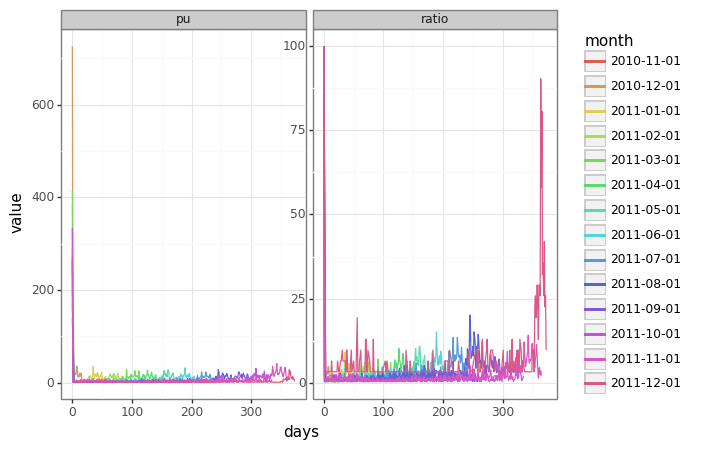

<ggplot: (8734224405301)>

In [27]:
(
    ggplot(cnt, aes('days', 'value', color = 'month')) +
    gg.geom_line() +
    gg.facet_wrap('~type', scales = 'free_y') + 
    gg.theme_bw()
)

# iterator

In [28]:
mat = [list('ABC'), list('DEF'), list('GHI')]
[r'({r},{c})-{letters}' for r, rows in enumerate(mat) for c, letters in enumerate(rows)]

['({r},{c})-{letters}',
 '({r},{c})-{letters}',
 '({r},{c})-{letters}',
 '({r},{c})-{letters}',
 '({r},{c})-{letters}',
 '({r},{c})-{letters}',
 '({r},{c})-{letters}',
 '({r},{c})-{letters}',
 '({r},{c})-{letters}']

In [29]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [34]:
{key : eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]],users ,[])') for key in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [35]:
x, y, z = [10, 1], [10, 1], [20, 1]
for a, b, c in product(x, y, z) : 
  if a + b + c >= 30 :
    print(a, b, c)

10 10 20
10 1 20
1 10 20


In [38]:
def add_arthor_with_name(name) :
  def add_arthor(func) :
    def wrapper(*args, **kwargs) :
      return name + '\n' + func(*args, **kwargs)
    return wrapper
  return add_arthor 

def add_arthor(func) :
  def wrapper(*args, **kwargs) :
    return 'this is the arthor' + '\n' + func(*args, **kwargs)
  return wrapper

@add_arthor_with_name('I want to believe')
def get_title(title) :
  return title 

@add_arthor
def get_titles(t1, t2) :
  return t1 + t2

In [39]:
print(get_title('really?'))
print('-' * 10)
print(get_titles('what', 'the?'))

I want to believe
really?
----------
this is the arthor
whatthe?
